### Student Information
Name:高睿駿

Student ID:711233108

GitHub ID:ThomasKAO0514

Kaggle name:ThomasKAO

Kaggle private scoreboard snapshot: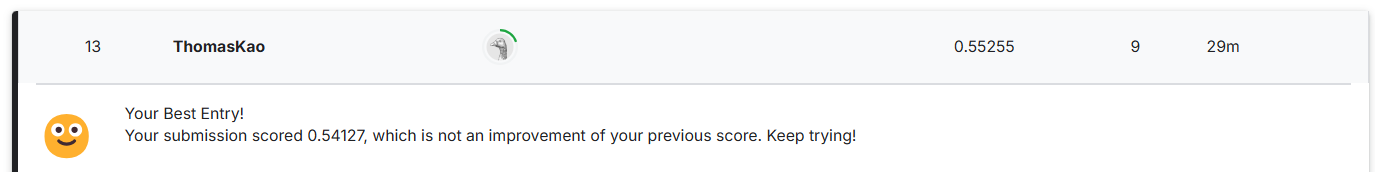

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

## **1. Data Preparation**

#### 1.1 Load data

In [ ]:
import pandas as pd

tweets = pd.read_json("tweets_DM.json", lines=True)
print(tweets.head())

   _score          _index                                            _source  \
0     391  hashtag_tweets  {'tweet': {'hashtags': ['Snapchat'], 'tweet_id...   
1     433  hashtag_tweets  {'tweet': {'hashtags': ['freepress', 'TrumpLeg...   
2     232  hashtag_tweets  {'tweet': {'hashtags': ['bibleverse'], 'tweet_...   
3     376  hashtag_tweets  {'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...   
4     989  hashtag_tweets  {'tweet': {'hashtags': [], 'tweet_id': '0x2de2...   

            _crawldate   _type  
0  2015-05-23 11:42:47  tweets  
1  2016-01-28 04:52:09  tweets  
2  2017-12-25 04:39:20  tweets  
3  2016-01-24 23:53:05  tweets  
4  2016-01-08 17:18:59  tweets  


In [ ]:
# Load the emotion labels dataset
emotion_df = pd.read_csv('emotion.csv')

# Load the dataset with data identification information
data_identification_df = pd.read_csv('data_identification.csv')

# Display the shape of the data identification dataset
print(data_identification_df.shape)

# Display the first few rows of the data identification dataset
print(data_identification_df.head())


(1867535, 2)
   tweet_id identification
0  0x28cc61           test
1  0x29e452          train
2  0x2b3819          train
3  0x2db41f           test
4  0x2a2acc          train


In [5]:
print(emotion_df.shape)
print(emotion_df.head())

(1455563, 2)
   tweet_id       emotion
0  0x3140b1       sadness
1  0x368b73       disgust
2  0x296183  anticipation
3  0x2bd6e1           joy
4  0x2ee1dd  anticipation


In [6]:
len(tweets['_source'])

1867535

In [7]:
tweets['_source'][0]['tweet']


{'hashtags': ['Snapchat'],
 'tweet_id': '0x376b20',
 'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}

In [8]:
tweet_id = [tweets['_source'][i]['tweet']['tweet_id'] for i in range(len(tweets['_source']))]
tweet_text = [tweets['_source'][i]['tweet']['text'] for i in range(len(tweets['_source']))]

In [9]:
tweet_df = pd.DataFrame({'tweet_id': tweet_id, 'text': tweet_text})

In [10]:
print(tweet_df.shape)
tweet_df.head()

(1867535, 2)


,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."


In [ ]:
# concatenate dfs to one df by tweet_id
df = data_identification_df.merge(emotion_df, on='tweet_id', how='outer').merge(tweet_df, on='tweet_id', how='outer')
df.shape
df.head()

,tweet_id,identification,emotion,text
0,0x1c7f0f,test,NaN,"@JZED74 While inappropriate AF, he likely wasn..."
1,0x1c7f10,train,joy,o m g Shut Up And Dance though #BlackMirror <LH>
2,0x1c7f11,train,anticipation,On #twitch <LH> on the #Destinybeta #Destiny #...
3,0x1c7f12,test,NaN,I tried to figure out why you mean so much to ...
4,0x1c7f13,test,NaN,"The only “big plan” you ever had in your life,..."


In [ ]:
# train-test split
train_df = df[df['identification']=='train']
test_df = df[df['identification']=='test']

In [13]:
print("Training data size:", train_df.shape)
print(train_df.head())

Training data size: (1455563, 4)
   tweet_id identification       emotion  \
1  0x1c7f10          train           joy   
2  0x1c7f11          train  anticipation   
5  0x1c7f14          train           joy   
6  0x1c7f15          train           joy   
7  0x1c7f16          train       disgust   

                                                text  
1   o m g Shut Up And Dance though #BlackMirror <LH>  
2  On #twitch <LH> on the #Destinybeta #Destiny #...  
5  A nice sunny wak this morning not many <LH> ar...  
6  I'm one of those people who love candy corn......  
7  @metmuseum What are these? They look like some...  


In [14]:
print("Testing data size:", test_df.shape)
print(test_df.head())

Testing data size: (411972, 4)
   tweet_id identification emotion  \
0  0x1c7f0f           test     NaN   
3  0x1c7f12           test     NaN   
4  0x1c7f13           test     NaN   
8  0x1c7f17           test     NaN   
9  0x1c7f18           test     NaN   

                                                text  
0  @JZED74 While inappropriate AF, he likely wasn...  
3  I tried to figure out why you mean so much to ...  
4  The only “big plan” you ever had in your life,...  
8  Looking back on situations old & new, recent o...  
9  @jasoninthehouse Why do you insist on talking ...  


#### 1.2 Save data

In [15]:
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [16]:
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [17]:
train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

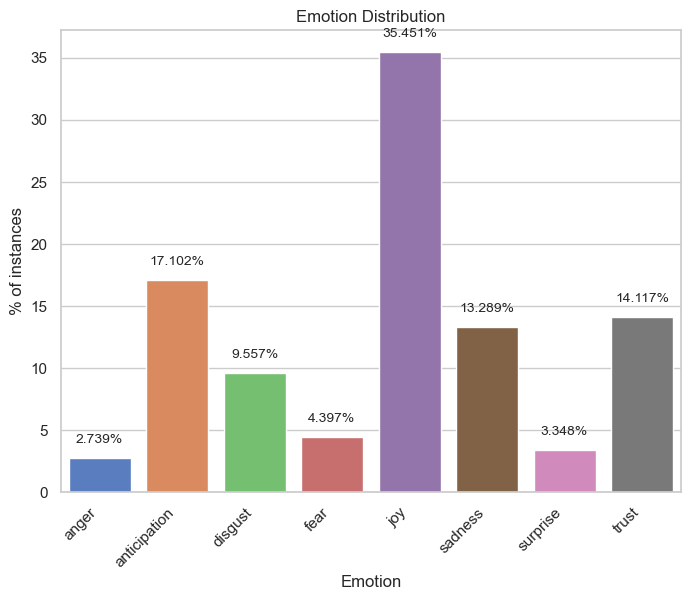

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract unique emotion labels and calculate the percentage distribution of each emotion
labels = train_df['emotion'].unique()
post_total = len(train_df)  # Total number of instances in the training dataset
df1 = train_df.groupby(['emotion']).count()['text']  # Count instances for each emotion
df1 = df1.apply(lambda x: round(x * 100 / post_total, 3))  # Calculate percentages

# Set the visual style for seaborn plots
sns.set(style="whitegrid")

# Create the figure and axis objects for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar plot using seaborn for a polished look
sns.barplot(x=df1.index, y=df1.values, palette='muted', ax=ax)

# Set labels and title for the plot
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion Distribution')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the corresponding percentage value
for i, v in enumerate(df1.values):
    ax.text(i, v + 1, f'{v}%', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()



From the figure, you can see the emotion distribution of the training data.

<hr>

## **2. Data cleaning and data processing**

In this step, we clean and convert the text into a format that BERT can handle. Specifically, we will use BertTokenizer to convert the text into the token ids required by BERT.

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer

# Load datasets
train_df = pd.read_pickle("train_df.pkl")  # Load the training dataset
test_df = pd.read_pickle("test_df.pkl")  # Load the testing dataset

# Function for text cleaning
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)  # Remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)  # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    return text

# Apply the cleaning function to the text columns
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

# Encode emotion labels
label_encoder = LabelEncoder()  # Initialize the label encoder
train_df['label'] = label_encoder.fit_transform(train_df['emotion'])  # Fit and transform the labels
train_labels = train_df['label'].values  # Store the encoded labels in an array

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the cleaned text in the training and testing datasets
train_encodings = tokenizer(
    list(train_df['cleaned_text']),  # Convert the training text to a list
    truncation=True,  # Truncate sequences longer than max_length
    padding=True,  # Add padding to sequences to ensure equal length
    max_length=128  # Set the maximum sequence length
)
test_encodings = tokenizer(
    list(test_df['cleaned_text']),  # Convert the testing text to a list
    truncation=True,
    padding=True,
    max_length=128
)



## **3. Build the Training Dataset class and DataLoader**

BERT models require data to be processed in the format of the PyTorch Dataset class. This makes it easier to feed data to the model for training.

In [ ]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from tqdm import tqdm

# Custom Dataset class for training data
class EmotionDataset_Train(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        """
        Initializes the dataset.

        Args:
            dataframe (pd.DataFrame): Input DataFrame containing text and emotion labels.
            tokenizer (BertTokenizer): Tokenizer to convert text into token IDs.
            max_len (int): Maximum length for tokenized sequences.
        """
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        """
        Returns the number of samples in the dataset.
        
        Returns:
            int: Total number of rows in the DataFrame.
        """
        return len(self.dataframe)

    def __getitem__(self, idx):
        """
        Retrieves a single data item (text and label) by index.

        Args:
            idx (int): Index of the sample to retrieve.

        Returns:
            dict: A dictionary containing:
                - 'input_ids': Token IDs as a PyTorch tensor.
                - 'attention_mask': Attention mask as a PyTorch tensor.
                - 'labels': Encoded label as a PyTorch tensor.
        """
        # Retrieve text and label from the DataFrame
        text = self.dataframe.iloc[idx]['text']
        label = self.dataframe.iloc[idx]['emotion']

        # Encode the label using the label encoder
        label = label_encoder.transform([label])[0]  # Transform label into an integer

        # Tokenize the text using the tokenizer
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,           # Include special tokens like [CLS] and [SEP]
            max_length=self.max_len,           # Truncate or pad to the maximum length
            padding='max_length',              # Pad to the specified max length
            truncation=True,                   # Truncate sequences longer than max_len
            return_tensors='pt'                # Return tensors in PyTorch format
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),          # Flatten the input IDs tensor
            'attention_mask': encoding['attention_mask'].flatten(), # Flatten the attention mask tensor
            'labels': torch.tensor(label, dtype=torch.long)        # Convert label to a PyTorch tensor
        }

# Create the training dataset
train_dataset = EmotionDataset_Train(train_df, tokenizer, max_len=128)

# Create the DataLoader for batch processing
train_dataloader = DataLoader(
    train_dataset,           # Input dataset
    batch_size=64,           # Number of samples per batch
    shuffle=True             # Shuffle the dataset at every epoch
)



## **4.BERT model training**

#### 4.1 Training

In this code, Hugging Face's BertForSequenceClassification is first loaded as the base model, which is specifically used for text classification tasks. In order to accelerate the calculation, GPU or CPU is dynamically selected as the computing device according to the current system environment, and the model is moved to the corresponding device.

Next, the data undergoes appropriate word segmentation to generate a format that the model can understand. Among them, input_ids is the encoding result of the text, attention_mask is used to mark which words are valid inputs, and labels contains the corresponding labels of each piece of data. These fields are organized into DataLoader for batch training.

During the training process, parameters such as the learning rate, the number of training rounds, and the size of each batch of data are set. Inside the training loop, the model receives data batch by batch, calculates a loss function to reflect the deviation between predictions and actual labels, and uses backpropagation to update model parameters. The prediction results of each batch are recorded and used to calculate the accuracy and average loss of the entire round.

After each training round, the program will output the average loss and accuracy of the round, providing instant feedback on the model training effect, thereby helping to evaluate the model's performance and learning progress.

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score

# Load the pre-trained BERT model for sequence classification
# Specify the number of labels for classification (based on label encoder)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the selected device

# Initialize the optimizer with the model's parameters and learning rate
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop configuration
num_epochs = 3  # Number of epochs for training

# Training loop
for epoch in range(num_epochs):
    model.train()  # Enable training mode (e.g., applies dropout)
    running_loss = 0.0  # Tracks the cumulative loss for the epoch
    all_preds = []  # Stores all predictions for accuracy calculation
    all_labels = []  # Stores all true labels for accuracy calculation

    # Iterate through the DataLoader with a progress bar using tqdm
    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs}", ncols=100):
        # Move input data and labels to the selected device (GPU/CPU)
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass: compute predictions and loss
        optimizer.zero_grad()  # Reset gradients before backward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss  # Computed loss
        logits = outputs.logits  # Predicted logits

        # Calculate predictions (argmax to get predicted labels)
        preds = torch.argmax(logits, dim=1)

        # Accumulate predictions and labels for accuracy calculation
        all_preds.extend(preds.cpu().numpy())  # Move predictions to CPU and convert to numpy
        all_labels.extend(labels.cpu().numpy())  # Move labels to CPU and convert to numpy

        # Backward pass: compute gradients and update model weights
        loss.backward()  # Compute gradients
        optimizer.step()  # Update model weights

        # Accumulate the loss for the current batch
        running_loss += loss.item()

    # Calculate and print the average loss and accuracy for the current epoch
    accuracy = accuracy_score(all_labels, all_preds)  # Compute accuracy using sklearn
    print(f"Epoch {epoch+1} Loss: {running_loss / len(train_dataloader):.4f}")  # Average loss
    print(f"Epoch {epoch+1} Accuracy: {accuracy:.4f}")  # Accuracy



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\User\anaconda3\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1/3:   0%|                                                          | 0/22744 [00:00<?, ?it/s]c:\Users\User\anaconda3\Lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attent

Epoch 1 Loss: 1.0264
Epoch 1 Accuracy: 0.6289


Epoch 2/3: 100%|████████████████████████████████████████████| 22744/22744 [1:13:51<00:00,  5.13it/s]


Epoch 2 Loss: 0.8707
Epoch 2 Accuracy: 0.6845


Epoch 3/3: 100%|████████████████████████████████████████████| 22744/22744 [1:11:45<00:00,  5.28it/s]


Epoch 3 Loss: 0.7808
Epoch 3 Accuracy: 0.7169


Loss decreases with the number of training epochs, indicating that the model is learning.

Accuracy gradually improves, indicating that the model's performance on the training data is improving.

After three epochs, the final accuracy is about 71.69%.

In [ ]:
# Define the directory path where the trained model will be saved
save_path = r"D:\高睿駿\DM\bert_emotion_model"

# Save the trained model's configuration and weights to the specified path
# This includes the model's architecture and pre-trained parameters
model.save_pretrained(save_path)

# Print a confirmation message indicating where the model was saved
print(f"Model saved to: {save_path}")



Model saved to: D:\高睿駿\DM\bert_emotion_model


## **5. Build the Testing Dataset class and DataLoader**

This class EmotionDataset_Test is a custom dataset class in PyTorch, used to handle textual data for emotion classification. It can be used with labels (training/validation sets) or without labels (test sets) and generates the formatted input required by the model.

In [ ]:
# Define a custom Dataset class for the test data
class EmotionDataset_Test(torch.utils.data.Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        """
        Initialize the EmotionDataset_Test class.

        Args:
        dataframe (pd.DataFrame): DataFrame containing the test data.
        tokenizer (transformers.PreTrainedTokenizer): Tokenizer for encoding the text data.
        max_len (int): Maximum token length for text sequences.
        """
        self.texts = dataframe['text'].values  # Extract text column from the DataFrame
        # Check if the DataFrame contains emotion labels; set to None if absent
        self.labels = dataframe['emotion'].values if 'emotion' in dataframe.columns else None
        self.tokenizer = tokenizer  # Tokenizer instance
        self.max_len = max_len  # Maximum sequence length

    def __len__(self):
        """
        Return the total number of samples in the dataset.
        """
        return len(self.texts)

    def __getitem__(self, idx):
        """
        Retrieve an encoded sample at the specified index.

        Args:
        idx (int): Index of the sample.

        Returns:
        dict: Dictionary containing input IDs, attention mask, and labels.
        """
        text = self.texts[idx]  # Get the text at the specified index
        # Tokenize and encode the text
        encoding = self.tokenizer(
            text,
            max_length=self.max_len,  # Ensure the sequence does not exceed max_len
            padding='max_length',  # Pad sequences to max_len
            truncation=True,  # Truncate sequences longer than max_len
            return_tensors='pt'  # Return PyTorch tensors
        )
        
        # If labels exist, return the label; otherwise, return a placeholder value (-1)
        label = torch.tensor(self.labels[idx]) if self.labels is not None else torch.tensor(-1)

        return {
            'input_ids': encoding['input_ids'].squeeze(0),  # Flatten the input IDs tensor
            'attention_mask': encoding['attention_mask'].squeeze(0),  # Flatten the attention mask tensor
            'labels': label  # Include the label
        }

# Create a test dataset instance
test_dataset = EmotionDataset_Test(test_df, tokenizer, max_len=128)

# Create a DataLoader for the test dataset
# Batch size is set to 64, and shuffling is disabled for evaluation
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)


## **6.BERT model testing**

This code mainly implements the complete process of using the trained BERT model to classify emotion on test data. The program first loads the saved model weights and sets it to evaluation mode, while moving the model to the GPU to accelerate inference. Then, through a DataLoader of test data, the data is processed batch by batch to perform inference by disabling gradient calculation, output the predicted category score of each text, and convert the most likely category into the corresponding emotion label. Finally, the prediction results are added as a new field in the test data set, the field names are modified to a standard format, and the results are finally saved as a CSV file for subsequent analysis.

In [ ]:
# Load the trained model from the specified path
model = BertForSequenceClassification.from_pretrained(save_path)
model.to(device)  # Move the model to GPU if available

# Set the model to evaluation mode
model.eval()
all_preds = []  # List to store predictions

# Disable gradient calculation to save memory and computation during evaluation
with torch.no_grad():
    # Iterate over the test DataLoader with a progress bar
    for batch in tqdm(test_dataloader, desc="Testing", ncols=100):
        # Move input data to the same device as the model
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        
        # Perform a forward pass to obtain predictions
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits  # Extract the logits (raw prediction scores)
        
        # Convert logits to predicted class indices
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())  # Append predictions to the list

# Convert the predicted class indices back to emotion labels
predicted_labels = label_encoder.inverse_transform(all_preds)

# Add the predicted emotion labels to the test DataFrame
test_df['emotion'] = predicted_labels

# Rename the column 'tweet_id' to 'id' for output formatting
test_df.rename(columns={'tweet_id': 'id'}, inplace=True)

# Display the first few rows of the results
print(test_df[['id', 'emotion']].head())

# Save the predictions to a CSV file
test_df[['id', 'emotion']].to_csv("D:/高睿駿/DM/test_predictions.csv", index=False)



Testing: 100%|██████████████████████████████████████████████████| 6438/6438 [07:52<00:00, 13.62it/s]


         id  emotion
0  0x1c7f0f  sadness
3  0x1c7f12      joy
4  0x1c7f13  sadness
8  0x1c7f17    trust
9  0x1c7f18  sadness
